# Library

In [1]:
import numpy as np
import pandas as pd

In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import optimization,statistic

%reload_ext autoreload

# Input Data

In [10]:
#buat matriks
n = 4
S = np.ones((n,n))*999

In [11]:
#isi matriks floyd_warshall
S[0,2]=2
S[1,0]=4
S[1,2]=3
S[2,3]=2
S[3,1]=1

# location to matrix

In [147]:
cities = np.array([[35, 51],
                   [113, 213],
                   [82, 280],
                   [322, 340],
                   [256, 352],
                   [160, 24],
                   [322, 145],
                   [12, 349],
                   [282, 20],
                   [241, 8],
                   [398, 153],
                   [182, 305],
                   [153, 257],
                   [275, 190],
                   [242, 75],
                   [19, 229],
                   [303, 352],
                   [39, 309],
                   [383, 79],
                   [226, 343]])

In [148]:
distances = optimization.compute_distances(cities)
pd.DataFrame(distances)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,179.799889,233.773395,407.295961,373.419335,127.882759,302.001656,298.886266,248.937743,210.440015,377.058351,293.470612,237.402612,277.346354,208.386660,178.717654,403.019851,258.031006,349.124620,348.919762
1,179.799889,0.000000,73.824115,244.560831,199.424171,194.756258,219.783985,169.401889,256.534598,241.679540,291.247318,115.000000,59.464275,163.624570,188.904738,95.351980,235.416652,121.210561,301.423290,172.246916
2,233.773395,73.824115,0.000000,247.386338,188.308258,267.619132,275.363396,98.290386,328.024389,315.063486,340.565706,103.077641,74.632433,212.953046,260.048072,81.055537,232.432786,51.865210,361.941984,157.178243
3,407.295961,244.560831,247.386338,0.000000,67.082039,355.105618,195.000000,310.130618,322.490310,341.738204,201.853908,144.308697,188.281704,157.190967,276.812211,322.691803,22.472205,284.692817,268.033580,96.046864
4,373.419335,199.424171,188.308258,67.082039,0.000000,341.760150,217.267117,244.018442,333.016516,344.326880,244.468812,87.664132,140.121376,163.110392,277.353565,267.016853,47.000000,221.219348,301.094669,31.320920
5,127.882759,194.756258,267.619132,355.105618,341.760150,0.000000,202.200396,357.112027,122.065556,82.565126,270.712024,281.859894,233.105126,201.943061,96.566040,248.809164,357.816992,309.622351,229.682389,325.756044
6,302.001656,219.783985,275.363396,195.000000,217.267117,202.200396,0.000000,371.101064,131.244047,159.154013,76.419893,212.602916,202.743681,65.069194,106.301458,314.428052,207.870152,327.085616,89.872131,220.045450
7,298.886266,169.401889,98.290386,310.130618,244.018442,357.112027,371.101064,0.000000,425.606626,410.757836,432.911076,175.601822,168.359734,307.327187,357.737334,120.203993,291.015464,48.259714,458.847469,214.084096
8,248.937743,256.534598,328.024389,322.490310,333.016516,122.065556,131.244047,425.606626,0.000000,42.720019,176.479461,302.034766,269.833282,170.144057,68.007353,335.931541,332.663494,377.584428,116.970082,327.818547
9,210.440015,241.679540,315.063486,341.738204,344.326880,82.565126,159.154013,410.757836,42.720019,0.000000,213.714763,302.803567,264.092787,185.148589,67.007462,313.249102,349.542558,362.498276,158.760826,335.335653


# Floyd Warshall

In [91]:
#hasil matriks floyd_warshall
print("matriks awal\n")
print(S)
dist,nxt,res = optimization.floyd_warshall(S,1,4)
print("\nmatriks floyd_warshall\n")
print(dist)
print("\nresult")
print(res)

matriks awal

[[999. 999.   2. 999.]
 [  4. 999.   3. 999.]
 [999. 999. 999.   2.]
 [999.   1. 999. 999.]]

matriks floyd_warshall

[[0. 5. 2. 4.]
 [4. 0. 3. 5.]
 [7. 3. 0. 2.]
 [5. 1. 4. 0.]]

result
pasangan     jarak    jalur
1 → 4          4      1 → 3 → 4


# prism algorithm

In [83]:
#buat matriks
n = 9
S = np.zeros((n,n))

In [84]:
#isi matriks floyd_warshall
S[0,1]=4
S[0,7]=8
S[1,2]=8
S[1,7]=11
S[2,3]=7

S[2,5]=2
S[2,8]=4
S[3,4]=9
S[3,5]=14
S[4,5]=10
S[5,6]=2
S[6,8]=6
S[6,7]=1
S[7,8]=7

In [106]:
#hasil matriks floyd_warshall
print("matriks awal\n")
print(S)
res = optimization.prims(S)
print("\n\nmatriks floyd_warshall\n")
res

matriks awal

[[ 0.  4.  0.  0.  0.  0.  0.  8.  0.]
 [ 0.  0.  8.  0.  0.  0.  0. 11.  0.]
 [ 0.  0.  0.  7.  0.  2.  0.  0.  4.]
 [ 0.  0.  0.  0.  9. 14.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 10.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  2.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  6.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  7.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]]


matriks floyd_warshall



,From,To,Distance,Cumulative
0,0,1,4.0,4.0
1,0,7,8.0,12.0
2,7,8,7.0,19.0
3,1,2,8.0,27.0
4,2,5,2.0,29.0
5,5,6,2.0,31.0
6,2,3,7.0,38.0
7,3,4,9.0,47.0


# Linear Network Models - Shortest Paths

## generate data

In [155]:
test=optimization.shortest_path(get='generate data',n=13)

In [156]:
test

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12
P0,0.0,16.0,0.0,57.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
P1,16.0,0.0,0.0,46.0,0.0,0.0,60.0,86.0,0.0,0.0,0.0,0.0,0.0
P2,0.0,28.0,0.0,0.0,0.0,0.0,44.0,63.0,61.0,0.0,0.0,0.0,0.0
P3,57.0,0.0,0.0,0.0,0.0,0.0,14.0,45.0,41.0,0.0,0.0,0.0,0.0
P4,0.0,45.0,48.0,0.0,0.0,18.0,33.0,0.0,62.0,0.0,0.0,0.0,0.0
P5,51.0,52.0,0.0,42.0,0.0,0.0,51.0,83.0,0.0,0.0,0.0,35.0,0.0
P6,71.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,32.0,0.0
P7,0.0,86.0,63.0,45.0,66.0,0.0,32.0,0.0,4.0,69.0,0.0,0.0,0.0
P8,0.0,0.0,61.0,41.0,62.0,79.0,28.0,0.0,0.0,0.0,13.0,0.0,21.0
P9,0.0,0.0,0.0,40.0,26.0,0.0,41.0,69.0,0.0,0.0,55.0,11.0,80.0


## start = 0 and end = len(n)

In [157]:
optimization.shortest_path(data=test.to_numpy(),get='run',n=13)

,Points,Distance,Cumulative
1,0,0,0
2,3,57,57
3,8,41,98
4,12,21,119


## Shortest Paths with sources

In [193]:
res_1,res_2 = optimization.shortest_path(data=test.to_numpy(),get='run_w_sources',sources=[0,12],n=13)

In [194]:
res_1

,0-Target,Cost,[Path]
0,0,0.0,None
1,1,16.0,"[0, 1]"
2,2,97.0,"[0, 4, 2]"
3,3,57.0,"[0, 3]"
4,4,49.0,"[0, 4]"
5,5,67.0,"[0, 4, 5]"
6,6,71.0,"[0, 3, 6]"
7,7,102.0,"[0, 1, 7]"
8,8,98.0,"[0, 3, 8]"
9,9,113.0,"[0, 4, 5, 11, 9]"


In [195]:
res_2

,12-Target,Cost,[Path]
0,0,119.0,"[12, 8, 3, 0]"
1,1,110.0,"[12, 8, 2, 1]"
2,2,82.0,"[12, 8, 2]"
3,3,62.0,"[12, 8, 3]"
4,4,83.0,"[12, 8, 4]"
5,5,97.0,"[12, 10, 5]"
6,6,49.0,"[12, 8, 6]"
7,7,41.0,"[12, 10, 7]"
8,8,21.0,"[12, 8]"
9,9,79.0,"[12, 11, 9]"


## other data

In [197]:
S

array([[999., 999.,   2., 999.],
       [  4., 999.,   3., 999.],
       [999., 999., 999.,   2.],
       [999.,   1., 999., 999.]])

In [198]:
optimization.shortest_path(data=S,get='run',n=13)

,Points,Distance,Cumulative
1,0,0,0
2,2,2,2
3,3,2,4


In [200]:
res_1,res_2 = optimization.shortest_path(data=S,get='run_w_sources',sources=[0,3])

In [201]:
res_1

,0-Target,Cost,[Path]
0,0,0.0,None
1,1,5.0,"[0, 2, 3, 1]"
2,2,2.0,"[0, 2]"
3,3,4.0,"[0, 2, 3]"


In [202]:
res_2

,3-Target,Cost,[Path]
0,0,5.0,"[3, 1, 0]"
1,1,1.0,"[3, 1]"
2,2,4.0,"[3, 1, 2]"
3,3,0.0,None


## All-Pairs Shortest Path

In [125]:
paths,mat = optimization.shortest_path(data=test.to_numpy(),get='all',n=13)

In [126]:
mat

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12
P0,0.0,30.0,54.0,33.0,42.0,40.0,53.0,78.0,74.0,59.0,102.0,100.0,92.0
P1,30.0,0.0,24.0,3.0,12.0,70.0,83.0,48.0,44.0,70.0,77.0,70.0,103.0
P2,58.0,63.0,0.0,65.0,27.0,71.0,84.0,24.0,28.0,85.0,53.0,54.0,118.0
P3,40.0,70.0,21.0,0.0,9.0,80.0,93.0,45.0,41.0,67.0,74.0,67.0,100.0
P4,31.0,61.0,27.0,64.0,0.0,71.0,84.0,51.0,55.0,58.0,80.0,81.0,91.0
P5,40.0,53.0,71.0,50.0,44.0,0.0,13.0,85.0,89.0,19.0,62.0,71.0,52.0
P6,63.0,42.0,59.0,45.0,32.0,45.0,0.0,72.0,76.0,26.0,49.0,58.0,59.0
P7,69.0,39.0,62.0,41.0,42.0,91.0,88.0,0.0,4.0,98.0,29.0,30.0,99.0
P8,81.0,111.0,62.0,41.0,50.0,97.0,84.0,86.0,0.0,101.0,115.0,26.0,95.0
P9,59.0,72.0,90.0,69.0,63.0,19.0,32.0,95.0,99.0,0.0,69.0,90.0,33.0


# TSP

## location to matrix

In [20]:
cities = np.array([[35, 51],
                   [113, 213],
                   [82, 280],
                   [322, 340],
                   [256, 352],
                   [160, 24],
                   [322, 145],
                   [12, 349],
                   [282, 20],
                   [241, 8],
                   [398, 153],
                   [182, 305],
                   [153, 257],
                   [275, 190],
                   [242, 75],
                   [19, 229],
                   [303, 352],
                   [39, 309],
                   [383, 79],
                   [226, 343]])

In [21]:
distances = optimization.compute_distances(cities)
pd.DataFrame(distances)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,179.799889,233.773395,407.295961,373.419335,127.882759,302.001656,298.886266,248.937743,210.440015,377.058351,293.470612,237.402612,277.346354,208.386660,178.717654,403.019851,258.031006,349.124620,348.919762
1,179.799889,0.000000,73.824115,244.560831,199.424171,194.756258,219.783985,169.401889,256.534598,241.679540,291.247318,115.000000,59.464275,163.624570,188.904738,95.351980,235.416652,121.210561,301.423290,172.246916
2,233.773395,73.824115,0.000000,247.386338,188.308258,267.619132,275.363396,98.290386,328.024389,315.063486,340.565706,103.077641,74.632433,212.953046,260.048072,81.055537,232.432786,51.865210,361.941984,157.178243
3,407.295961,244.560831,247.386338,0.000000,67.082039,355.105618,195.000000,310.130618,322.490310,341.738204,201.853908,144.308697,188.281704,157.190967,276.812211,322.691803,22.472205,284.692817,268.033580,96.046864
4,373.419335,199.424171,188.308258,67.082039,0.000000,341.760150,217.267117,244.018442,333.016516,344.326880,244.468812,87.664132,140.121376,163.110392,277.353565,267.016853,47.000000,221.219348,301.094669,31.320920
5,127.882759,194.756258,267.619132,355.105618,341.760150,0.000000,202.200396,357.112027,122.065556,82.565126,270.712024,281.859894,233.105126,201.943061,96.566040,248.809164,357.816992,309.622351,229.682389,325.756044
6,302.001656,219.783985,275.363396,195.000000,217.267117,202.200396,0.000000,371.101064,131.244047,159.154013,76.419893,212.602916,202.743681,65.069194,106.301458,314.428052,207.870152,327.085616,89.872131,220.045450
7,298.886266,169.401889,98.290386,310.130618,244.018442,357.112027,371.101064,0.000000,425.606626,410.757836,432.911076,175.601822,168.359734,307.327187,357.737334,120.203993,291.015464,48.259714,458.847469,214.084096
8,248.937743,256.534598,328.024389,322.490310,333.016516,122.065556,131.244047,425.606626,0.000000,42.720019,176.479461,302.034766,269.833282,170.144057,68.007353,335.931541,332.663494,377.584428,116.970082,327.818547
9,210.440015,241.679540,315.063486,341.738204,344.326880,82.565126,159.154013,410.757836,42.720019,0.000000,213.714763,302.803567,264.092787,185.148589,67.007462,313.249102,349.542558,362.498276,158.760826,335.335653


## generate data

In [228]:
res,points = optimization.tsp(data=None, get='generate data',sources=[None,None],n=13,seed=19)

In [229]:
res

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12
P0,0.0,185.0,255.0,540.0,355.0,193.0,333.0,755.0,415.0,573.0,417.0,451.0,800.0
P1,205.0,0.0,113.0,369.0,259.0,75.0,209.0,611.0,330.0,306.0,352.0,315.0,541.0
P2,313.0,80.0,0.0,240.0,103.0,113.0,136.0,498.0,238.0,380.0,424.0,311.0,441.0
P3,504.0,279.0,261.0,0.0,156.0,323.0,271.0,422.0,35.0,321.0,515.0,355.0,364.0
P4,399.0,242.0,102.0,152.0,0.0,214.0,79.0,527.0,141.0,340.0,271.0,409.0,417.0
P5,149.0,89.0,131.0,380.0,167.0,0.0,159.0,504.0,303.0,427.0,391.0,451.0,626.0
P6,307.0,243.0,120.0,283.0,80.0,167.0,0.0,557.0,222.0,469.0,257.0,412.0,429.0
P7,785.0,506.0,606.0,420.0,639.0,663.0,675.0,0.0,398.0,281.0,846.0,334.0,852.0
P8,426.0,290.0,241.0,36.0,177.0,287.0,249.0,378.0,0.0,315.0,449.0,467.0,509.0
P9,440.0,342.0,335.0,336.0,333.0,380.0,430.0,274.0,345.0,0.0,641.0,110.0,907.0


In [114]:
points

[(87, 6),
 (67, 16),
 (66, 26),
 (51, 45),
 (68, 38),
 (75, 19),
 (77, 34),
 (14, 34),
 (53, 42),
 (35, 14),
 (99, 42),
 (40, 3),
 (73, 80)]

## process

In [115]:
optimization.tsp(data=res.to_numpy(), get='iters',sources=[None,None],n=13,seed=19)

,Iter,value,Tour(s)
0,0,2307.0,"[[0, 5], [1, 2], [3, 8], [4, 6], [7, 9, 11], [..."
1,1,2735.0,"[[0, 1, 5], [2, 11, 9, 7, 8, 3, 12, 10, 6, 4]]"
2,2,2749.0,"[[0, 2, 1, 5], [3, 8, 7], [4, 6, 10, 12], [9, ..."
3,3,2770.0,"[[0, 11, 9, 7, 8, 3, 12, 10, 6, 4, 2, 1, 5]]"


## result

In [116]:
optimization.tsp(data=res.to_numpy(), get='run',sources=[None,None],n=13,seed=19)

,Nodes,Distance,Cumulative
0,0,0.0,0.0
1,11,451.0,451.0
2,9,123.0,574.0
3,7,274.0,848.0
4,8,398.0,1246.0
5,3,36.0,1282.0
6,12,364.0,1646.0
7,10,403.0,2049.0
8,6,235.0,2284.0
9,4,80.0,2364.0


## TSP-P

A simple variation occurring often is that, instead
of a tour (a closed path), one wants a simple path
covering all vertices. For reference, let’s call this
problem TSP-P

In [68]:
optimization.tsp(data=res.to_numpy(), get='path',sources=[None,None],n=13,seed=19)

,Nodes,Distance,Cumulative
0,12,0.0,0.0
1,10,403.0,403.0
2,6,235.0,638.0
3,5,167.0,805.0
4,0,149.0,954.0
5,1,185.0,1139.0
6,2,113.0,1252.0
7,4,103.0,1355.0
8,8,141.0,1496.0
9,3,36.0,1532.0


## TSP*

A more complex variation is to allow repeated visits to
nodes. For reference, let’s call this problem as TSP*. 

In [69]:
optimization.tsp(data=res.to_numpy(), get='star',sources=[None,None],n=13,seed=19)

,NB 14,Distance,Cumulative
0,0,0.0,0.0
1,11,451.0,451.0
2,9,123.0,574.0
3,7,274.0,848.0
4,8,398.0,1246.0
5,3,36.0,1282.0
6,12,364.0,1646.0
7,10,403.0,2049.0
8,6,235.0,2284.0
9,4,80.0,2364.0


## Held-Karp dynamic programming

In [88]:
optimization.tsp(data=res.to_numpy(), get='held_karp',sources=[None,None],n=13,seed=19)

,Nodes,Distance,Cumulative
0,0,0.0,0.0
1,11,451.0,451.0
2,9,123.0,574.0
3,7,274.0,848.0
4,8,398.0,1246.0
5,3,36.0,1282.0
6,12,364.0,1646.0
7,10,403.0,2049.0
8,6,235.0,2284.0
9,4,80.0,2364.0


## OR google 

In [230]:
data = optimization.data_model_or(res.to_numpy())

In [231]:
pd.DataFrame(data['distance_matrix'])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,185,255,540,355,193,333,755,415,573,417,451,800
1,205,0,113,369,259,75,209,611,330,306,352,315,541
2,313,80,0,240,103,113,136,498,238,380,424,311,441
3,504,279,261,0,156,323,271,422,35,321,515,355,364
4,399,242,102,152,0,214,79,527,141,340,271,409,417
5,149,89,131,380,167,0,159,504,303,427,391,451,626
6,307,243,120,283,80,167,0,557,222,469,257,412,429
7,785,506,606,420,639,663,675,0,398,281,846,334,852
8,426,290,241,36,177,287,249,378,0,315,449,467,509
9,440,342,335,336,333,380,430,274,345,0,641,110,907


In [232]:
optimization.tsp_or(data)

,Nodes,Distance,Cumulative
0,0,0,0
1,11,451,451
2,9,123,574
3,7,274,848
4,8,398,1246
5,3,36,1282
6,12,364,1646
7,10,403,2049
8,6,235,2284
9,4,80,2364


# other example for TSP

In [237]:
df = pd.read_csv(f"E:/gitlab/machine-learning/dataset/tsp.csv", header=None, index_col=None)

In [238]:
df = df.fillna(0)
df

,0,1,2,3,4,5,6,7,8,9
0,0.0,711.0,107.0,516.0,387.0,408.0,539.0,309.0,566.0,771.0
1,539.0,0.0,769.0,881.0,380.0,546.0,655.0,443.0,295.0,1140.0
2,122.0,752.0,0.0,281.0,441.0,264.0,318.0,448.0,588.0,730.0
3,519.0,875.0,274.0,0.0,435.0,334.0,93.0,776.0,949.0,302.0
4,484.0,561.0,338.0,419.0,0.0,118.0,268.0,607.0,495.0,431.0
5,409.0,406.0,244.0,380.0,93.0,0.0,295.0,544.0,549.0,494.0
6,479.0,735.0,334.0,101.0,345.0,247.0,0.0,679.0,809.0,238.0
7,221.0,444.0,433.0,744.0,487.0,435.0,649.0,0.0,325.0,840.0
8,510.0,303.0,599.0,984.0,531.0,553.0,847.0,350.0,0.0,1001.0
9,663.0,989.0,664.0,335.0,588.0,434.0,297.0,1093.0,1012.0,0.0


In [239]:
optimization.tsp(data=df.to_numpy(), get='iters',sources=[None,None],n=13,seed=19)

,Iter,value,Tour(s)
0,0,2177.0,"[[0, 2], [1, 7, 8], [3, 6, 9], [4, 5]]"
1,1,2526.0,"[[0, 2, 7], [1, 8], [3, 6], [4, 9, 5]]"
2,2,2673.0,"[[0, 2, 3, 6, 9, 5, 4, 1, 8, 7]]"


## result

In [240]:
optimization.tsp(data=df.to_numpy(), get='run',sources=[None,None],seed=19)

,Nodes,Distance,Cumulative
0,0,0.0,0.0
1,2,107.0,107.0
2,3,281.0,388.0
3,6,93.0,481.0
4,9,238.0,719.0
5,5,434.0,1153.0
6,4,93.0,1246.0
7,1,561.0,1807.0
8,8,295.0,2102.0
9,7,350.0,2452.0


## TSP-P

A simple variation occurring often is that, instead
of a tour (a closed path), one wants a simple path
covering all vertices. For reference, let’s call this
problem TSP-P

In [97]:
optimization.tsp(data=df.to_numpy(), get='path',sources=[None,None],seed=19)

,Nodes,Distance,Cumulative
0,1,0.0,0.0
1,8,295.0,295.0
2,7,350.0,645.0
3,0,221.0,866.0
4,2,107.0,973.0
5,5,264.0,1237.0
6,4,93.0,1330.0
7,6,268.0,1598.0
8,3,101.0,1699.0
9,9,302.0,2001.0


## TSP*

A more complex variation is to allow repeated visits to
nodes. For reference, let’s call this problem as TSP*. 

In [98]:
optimization.tsp(data=df.to_numpy(), get='star',sources=[None,None],n=13,seed=19)

,NB 12,Distance,Cumulative
0,0,0.0,0.0
1,2,107.0,107.0
2,3,281.0,388.0
3,6,93.0,481.0
4,9,238.0,719.0
5,5,434.0,1153.0
6,4,93.0,1246.0
7,5,118.0,1364.0
8,1,406.0,1770.0
9,8,295.0,2065.0


## Held-Karp dynamic programming

In [106]:
optimization.tsp(data=df.to_numpy(), get='held_karp',sources=[None,None],n=13,seed=19)

,Nodes,Distance,Cumulative
0,0,0.0,0.0
1,2,107.0,107.0
2,3,281.0,388.0
3,6,93.0,481.0
4,9,238.0,719.0
5,5,434.0,1153.0
6,4,93.0,1246.0
7,1,561.0,1807.0
8,8,295.0,2102.0
9,7,350.0,2452.0


## OR google

In [254]:
data = optimization.data_model_or(df.values.tolist())

In [255]:
data['distance_matrix']

array([[   0,  711,  107,  516,  387,  408,  539,  309,  566,  771],
       [ 539,    0,  769,  881,  380,  546,  655,  443,  295, 1140],
       [ 122,  752,    0,  281,  441,  264,  318,  448,  588,  730],
       [ 519,  875,  274,    0,  435,  334,   93,  776,  949,  302],
       [ 484,  561,  338,  419,    0,  118,  268,  607,  495,  431],
       [ 409,  406,  244,  380,   93,    0,  295,  544,  549,  494],
       [ 479,  735,  334,  101,  345,  247,    0,  679,  809,  238],
       [ 221,  444,  433,  744,  487,  435,  649,    0,  325,  840],
       [ 510,  303,  599,  984,  531,  553,  847,  350,    0, 1001],
       [ 663,  989,  664,  335,  588,  434,  297, 1093, 1012,    0]])

In [256]:
optimization.tsp_or(data)

,Nodes,Distance,Cumulative
0,0,0,0
1,2,107,107
2,3,281,388
3,6,93,481
4,9,238,719
5,5,434,1153
6,4,93,1246
7,1,561,1807
8,8,295,2102
9,7,350,2452


## other example of TSP 2

In [134]:
df = pd.read_csv(f"D:city.csv", sep=';', index_col=None)

In [135]:
S = np.zeros((len(df),len(df)))

In [136]:
df

,code,lat,long,name
0,[TCL],33.23,87.62,"Tuscaloosa,AL"
1,[FLG],35.13,111.67,"Flagstaff,AZ"
2,[PHX],33.43,112.02,"Phoenix,AZ"
3,[PGA],36.93,111.45,"Page,AZ"
4,[TUS],32.12,110.93,"Tucson,AZ"
...,...,...,...,...
75,[ALW],46.10,118.28,"Walla Walla,WA"
76,[GRB],44.48,88.13,"Green Bay,WI"
77,[MKE],42.95,87.90,"Milwaukee,WI"
78,[CYS],41.15,104.82,"Cheyenne,WY"


In [137]:
dist = df[["lat","long"]].to_numpy()

In [138]:
dists = optimization.compute_distances(dist,types='euler')

In [153]:
pd.DataFrame(dists)

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.000000,24.124935,24.400820,24.115532,23.336414,5.159234,35.036120,30.787959,34.290502,29.554230,...,22.812902,18.623732,11.140781,38.224769,37.482140,33.251654,11.261554,9.724032,18.935850,22.529849
1,24.124935,0.000000,1.735655,1.813395,3.099629,19.290210,10.995645,6.836147,10.398125,6.000833,...,4.115337,40.138198,34.421686,17.458766,16.272040,12.807537,25.328918,25.023295,9.119369,10.724719
2,24.400820,1.735655,0.000000,3.546111,1.704171,19.721402,11.175227,6.399562,10.760042,5.197355,...,5.802456,40.893709,34.927940,18.619801,17.385017,14.132109,26.321751,25.930769,10.556439,12.413626
3,24.115532,1.813395,3.546111,0.000000,4.838026,19.146514,10.951758,7.569841,10.174999,7.096365,...,2.505115,39.553853,34.124761,16.237712,15.112673,11.434063,24.511730,24.307260,7.859090,9.029729
4,23.336414,3.099629,1.704171,4.838026,0.000000,18.807246,12.702460,7.686156,12.356573,6.269745,...,6.753880,40.217111,34.027994,20.317047,19.086273,15.794395,25.934718,25.449358,10.902890,13.255342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,33.251654,12.807537,14.132109,11.434063,15.794395,28.092426,9.419151,12.170592,8.235581,13.415998,...,11.246768,45.749471,41.843309,5.035127,4.240625,0.000000,30.193491,30.542870,14.341342,11.387932
76,11.261554,25.328918,26.321751,24.511730,25.934718,10.188724,34.930246,32.055817,33.898060,31.327051,...,22.361317,15.562519,12.859253,34.670195,34.298831,30.193491,0.000000,1.547191,17.018960,18.842232
77,9.724032,25.023295,25.930769,24.307260,25.449358,8.934389,34.889530,31.805823,33.890779,31.002924,...,22.246233,15.380878,11.892325,35.120641,34.693083,30.542870,1.547191,0.000000,17.015475,19.156652
78,18.935850,9.119369,10.556439,7.859090,10.902890,13.781092,17.911295,15.380013,16.886068,14.947204,...,5.474422,32.393904,27.731257,19.291620,18.580646,14.341342,17.018960,17.015475,0.000000,4.210333


In [140]:
optimization.tsp(data=dists, get='iters',sources=[None,None],n=13,seed=19)

,Iter,value,Tour(s)
0,0,185.2931,"[[0, 61], [1, 3], [2, 4], [5, 34], [6, 10], [7..."
1,1,216.6909,"[[0, 26, 35], [1, 2, 4], [3, 69, 41, 9, 7, 10,..."
2,2,223.3795,"[[0, 18, 62, 25, 51, 21, 20, 77, 76, 33, 32, 4..."
3,3,226.4125,"[[0, 61, 5, 34, 20, 77, 76, 33, 32, 49, 50, 60..."
4,4,227.0822,"[[0, 18, 62, 25, 51, 21, 20, 77, 76, 33, 32, 4..."
5,5,227.1272,"[[0, 61, 5, 34, 21, 20, 77, 76, 33, 32, 49, 50..."
6,6,227.6679,"[[0, 61, 5, 34, 21, 51, 25, 62, 18, 17, 15, 14..."
7,7,228.0473,"[[0, 35, 26, 65, 63, 66, 64, 53, 24, 22, 40, 2..."
8,8,228.2662,"[[0, 62, 18, 17, 15, 14, 16, 58, 39, 38, 72, 1..."
9,9,229.1837,"[[0, 61, 5, 34, 21, 51, 25, 62, 18, 17, 15, 14..."


In [141]:
res_1 = optimization.tsp(data=dists, get='run',sources=[None,None],n=13,seed=19)
res_1

,Nodes,Distance,Cumulative
0,0,0.000000,0.000000
1,35,2.622918,2.622918
2,26,2.290546,4.913464
3,65,5.320338,10.233802
4,63,3.076118,13.309920
...,...,...,...
76,21,1.738505,216.141126
77,34,4.215495,220.356621
78,5,4.062142,224.418764
79,61,2.386064,226.804827


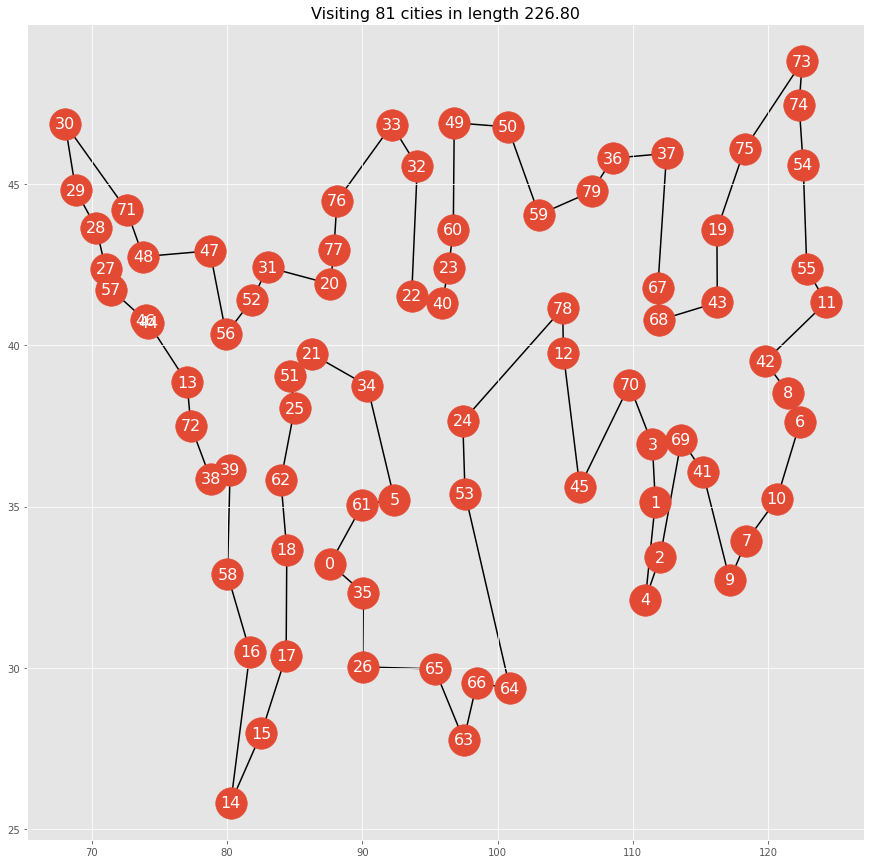

In [142]:
optimization.loc_result(dist,res_1['Nodes'],res_1['Cumulative'][len(res)-1])

In [155]:
res_2 = optimization.tsp(data=dists, get='path',sources=[None,None],n=13,seed=19)
res_2

,Nodes,Distance,Cumulative
0,30,0.000000,0.000000
1,29,2.219212,2.219212
2,28,1.890106,4.109317
3,27,1.463728,5.573046
4,57,0.754718,6.327764
...,...,...,...
76,74,1.369452,211.263371
77,54,1.874166,213.137537
78,55,3.241265,216.378803
79,11,1.752056,218.130859


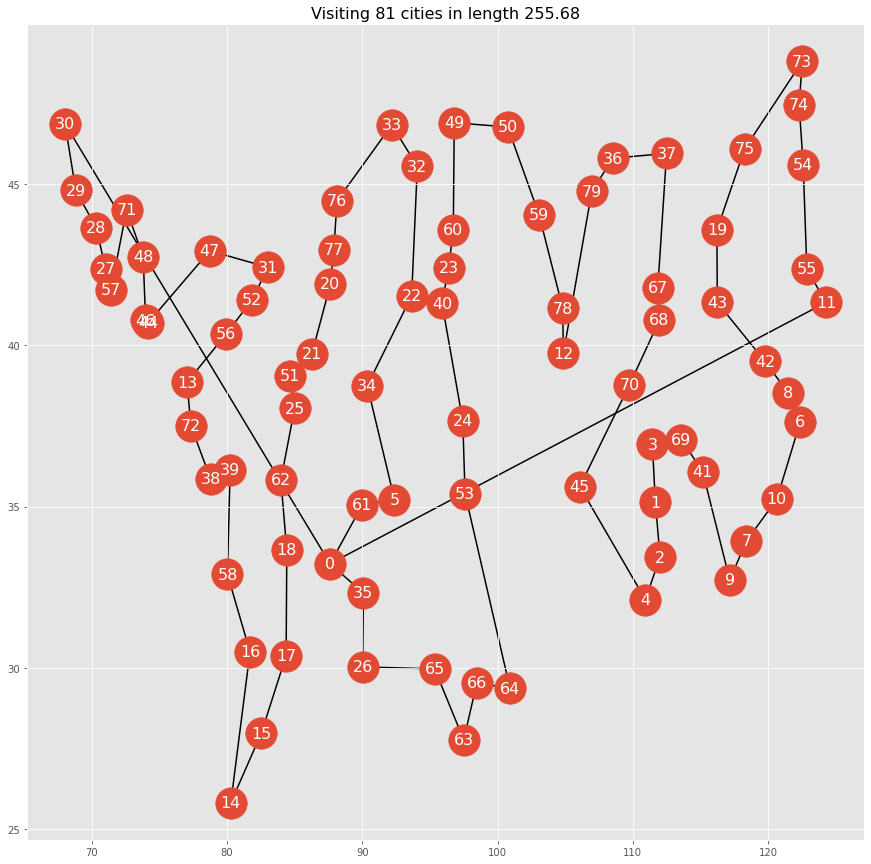

In [158]:
optimization.loc_result(dist,res_2['Nodes'],res_2['Cumulative'][len(res_2)-1])

In [147]:
res_3 = optimization.tsp(data=dists, get='star',sources=[None,None],n=13,seed=19)
res_3

,Nodes,Distance,Cumulative
0,0,0.000000,0.000000
1,35,2.622918,2.622918
2,26,2.290546,4.913464
3,65,5.320338,10.233802
4,63,3.076118,13.309920
...,...,...,...
76,21,1.738505,216.141126
77,34,4.215495,220.356621
78,5,4.062142,224.418764
79,61,2.386064,226.804827


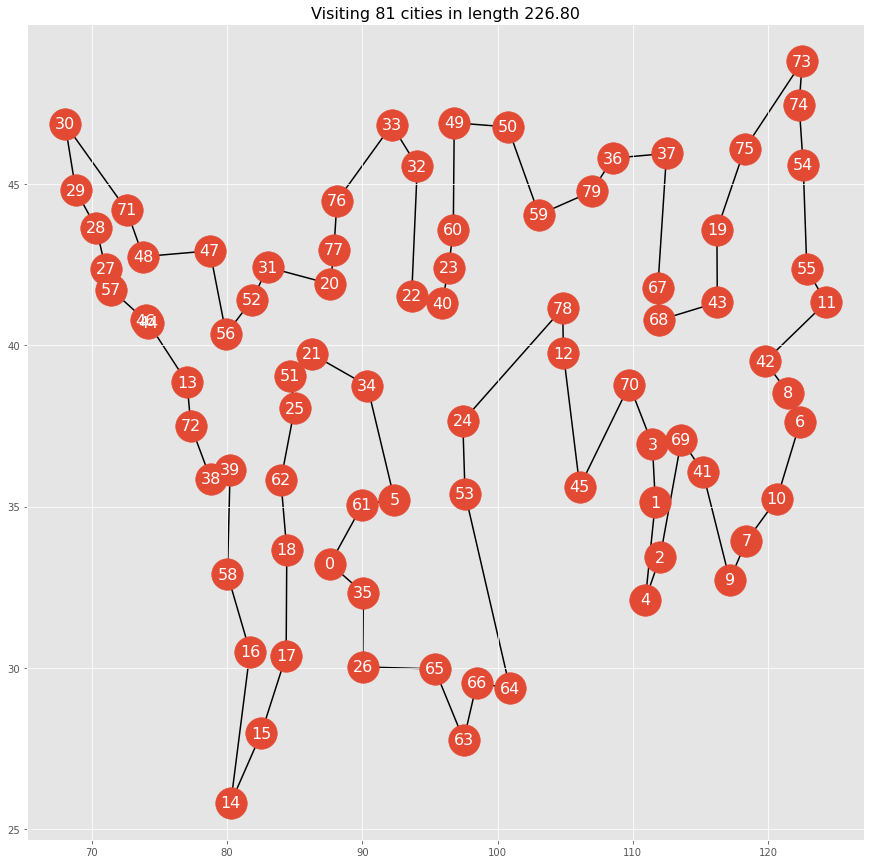

In [148]:
optimization.loc_result(dist,res_3['Nodes'],res_3['Cumulative'][len(res)-1])

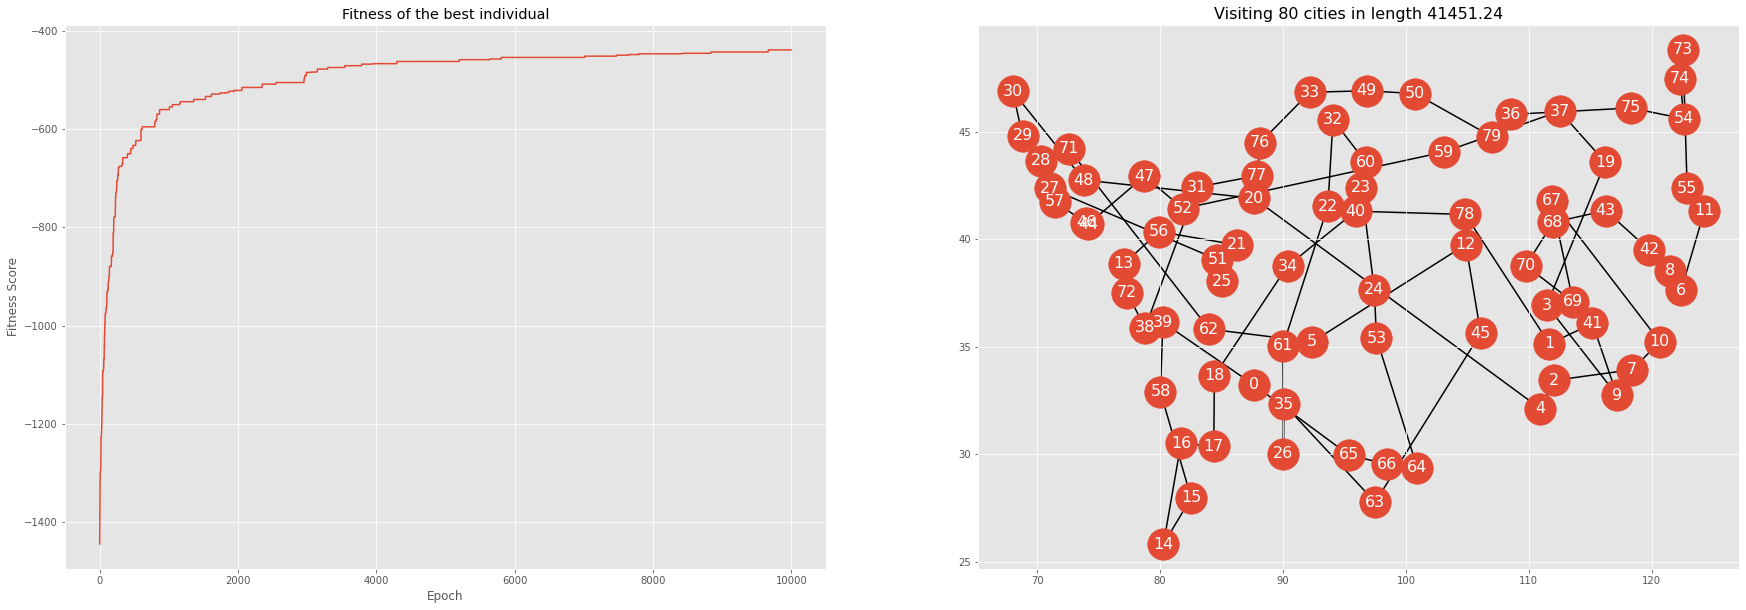

,Nodes,Distance,Cumulative
0,0,0.0000,0.0000
1,65,817.4792,817.4792
2,66,305.6942,1123.1734
3,64,238.3402,1361.5136
4,53,737.9255,2099.4391
...,...,...,...
76,14,537.0542,39419.4196
77,15,326.6573,39746.0769
78,58,596.9146,40342.9915
79,39,358.7798,40701.7713


In [159]:
res_4 = optimization.tsp_evo(df[["lat","long"]].to_numpy(),mutate_rate=1,n_epochs = 10000)
res_4

In [ ]:
optimization.tsp(data=dists, get='held_karp',sources=[None,None],n=13,seed=19)

# Evolutionary-Algorithm for TSP

In [21]:
cities = np.array([[35, 51],
                   [113, 213],
                   [82, 280],
                   [322, 340],
                   [256, 352],
                   [160, 24],
                   [322, 145],
                   [12, 349],
                   [282, 20],
                   [241, 8],
                   [398, 153],
                   [182, 305],
                   [153, 257],
                   [275, 190],
                   [242, 75],
                   [19, 229],
                   [303, 352],
                   [39, 309],
                   [383, 79],
                   [226, 343]])

In [102]:
cities = pd.DataFrame(cities,columns=['long','lat'])
cities

,long,lat
0,35,51
1,113,213
2,82,280
3,322,340
4,256,352
5,160,24
6,322,145
7,12,349
8,282,20
9,241,8


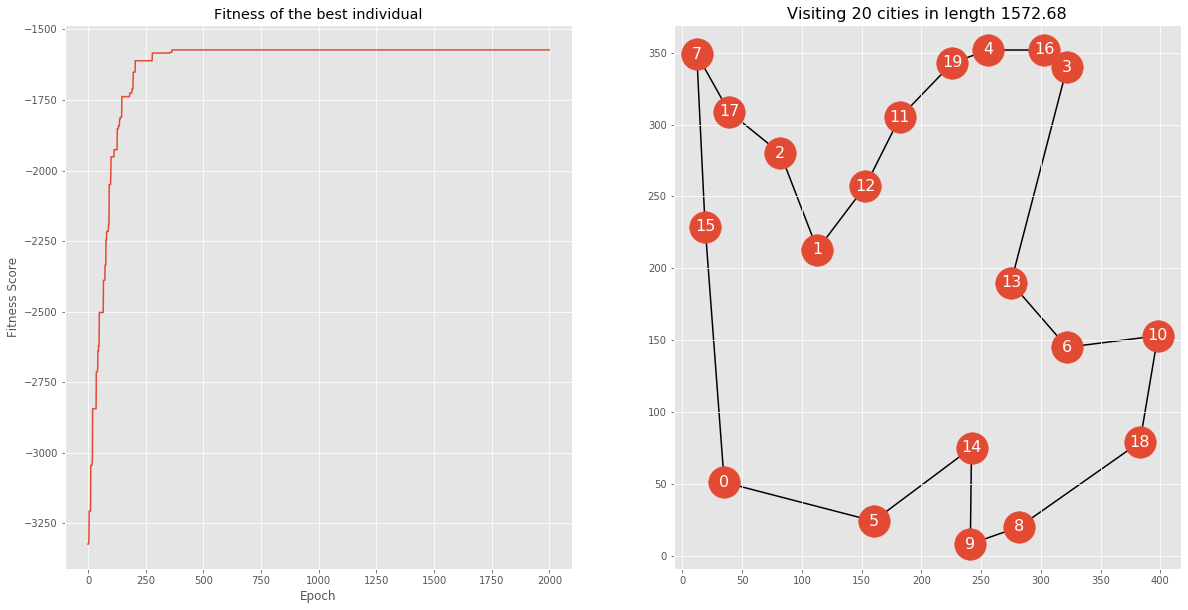

In [79]:
res = optimization.tsp_evo(cities,n_epochs = 2000)

In [80]:
res

,Nodes,Distance,Cumulative
0,0,0.000000,0.000000
1,5,127.882759,127.882759
2,14,96.566040,224.448798
3,9,67.007462,291.456261
4,8,42.720019,334.176279
5,18,116.970082,451.146361
6,10,75.504967,526.651328
7,6,76.419893,603.071220
8,13,65.069194,668.140414
9,3,157.190967,825.331381


## plot result for TSP

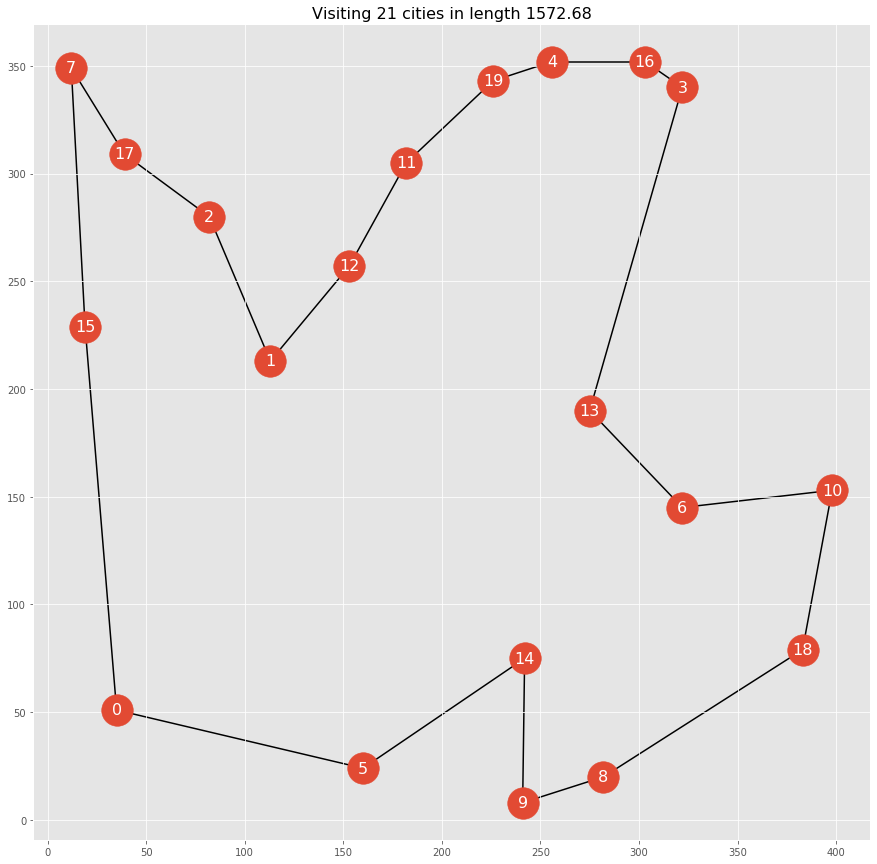

In [99]:
optimization.loc_result(cities,res['Nodes'],res['Cumulative'][len(res)-1])

# Vehicle Routing Problem

In [22]:
data = optimization.data_model_or(distances,num_vehicles=4)

In [23]:
pd.DataFrame(data['distance_matrix'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,180,234,407,373,128,302,299,249,210,377,293,237,277,208,179,403,258,349,349
1,180,0,74,245,199,195,220,169,257,242,291,115,59,164,189,95,235,121,301,172
2,234,74,0,247,188,268,275,98,328,315,341,103,75,213,260,81,232,52,362,157
3,407,245,247,0,67,355,195,310,322,342,202,144,188,157,277,323,22,285,268,96
4,373,199,188,67,0,342,217,244,333,344,244,88,140,163,277,267,47,221,301,31
5,128,195,268,355,342,0,202,357,122,83,271,282,233,202,97,249,358,310,230,326
6,302,220,275,195,217,202,0,371,131,159,76,213,203,65,106,314,208,327,90,220
7,299,169,98,310,244,357,371,0,426,411,433,176,168,307,358,120,291,48,459,214
8,249,257,328,322,333,122,131,426,0,43,176,302,270,170,68,336,333,378,117,328
9,210,242,315,342,344,83,159,411,43,0,214,303,264,185,67,313,350,362,159,335


In [24]:
optimization.vrp_or(data)

[0, 13, 4, 19, 11, 12, 1, 0]
[0, 14, 6, 10, 18, 8, 9, 5, 0]
[0, 3, 16, 0]
[0, 2, 17, 7, 15, 0]


,Nodes vehicle 0,Distance,Cumulative,Nodes vehicle 1,Distance,Cumulative,Nodes vehicle 2,Distance,Cumulative,Nodes vehicle 3,Distance,Cumulative
0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,13.0,277.0,277.0,14,208,208,3.0,407.0,407.0,2.0,234.0,234.0
2,4.0,163.0,440.0,6,106,314,16.0,22.0,429.0,17.0,52.0,286.0
3,19.0,31.0,471.0,10,76,390,0.0,403.0,832.0,7.0,48.0,334.0
4,11.0,58.0,529.0,18,76,466,NaN,NaN,NaN,15.0,120.0,454.0
5,12.0,56.0,585.0,8,117,583,NaN,NaN,NaN,0.0,179.0,633.0
6,1.0,59.0,644.0,9,43,626,NaN,NaN,NaN,NaN,NaN,NaN
7,0.0,180.0,824.0,5,83,709,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,0,128,837,NaN,NaN,NaN,NaN,NaN,NaN


# Capacitated vehicle routing problem (CVRP) 

In [128]:
data = optimization.data_model_or(distances,num_vehicles=4)

In [129]:
pd.DataFrame(data['distance_matrix'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,180,234,407,373,128,302,299,249,210,377,293,237,277,208,179,403,258,349,349
1,180,0,74,245,199,195,220,169,257,242,291,115,59,164,189,95,235,121,301,172
2,234,74,0,247,188,268,275,98,328,315,341,103,75,213,260,81,232,52,362,157
3,407,245,247,0,67,355,195,310,322,342,202,144,188,157,277,323,22,285,268,96
4,373,199,188,67,0,342,217,244,333,344,244,88,140,163,277,267,47,221,301,31
5,128,195,268,355,342,0,202,357,122,83,271,282,233,202,97,249,358,310,230,326
6,302,220,275,195,217,202,0,371,131,159,76,213,203,65,106,314,208,327,90,220
7,299,169,98,310,244,357,371,0,426,411,433,176,168,307,358,120,291,48,459,214
8,249,257,328,322,333,122,131,426,0,43,176,302,270,170,68,336,333,378,117,328
9,210,242,315,342,344,83,159,411,43,0,214,303,264,185,67,313,350,362,159,335


In [130]:
demands = [0, 1, 1, 2, 4, 2, 4, 8, 8, 1, 2, 1, 2, 4, 4, 8, 8, 1, 2, 3]
capacity = [20, 20, 20, 20]
# demands = [0, 1, 1, 2, 4, 2, 4, 8, 8, 1, 2, 1, 2, 4, 4, 8, 8]
# capacity = [15, 15, 15, 15]

In [133]:
result1,result2 = optimization.cvrp_or(data,demands,capacity)

In [134]:
result1

,Nodes vehicle 0,Distance,Cumulative,Capacity,Nodes vehicle 1,Distance,Cumulative,Capacity,Nodes vehicle 2,Distance,Cumulative,Capacity,Nodes vehicle 3,Distance,Cumulative,Capacity
0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,407,407,2,13.0,277.0,277.0,4.0,1.0,180.0,180.0,1.0,5.0,128.0,128.0,2.0
2,16,22,429,10,6.0,65.0,342.0,8.0,2.0,74.0,254.0,2.0,9.0,83.0,211.0,3.0
3,4,47,476,14,10.0,76.0,418.0,10.0,17.0,52.0,306.0,3.0,8.0,43.0,254.0,11.0
4,19,31,507,17,18.0,76.0,494.0,12.0,7.0,48.0,354.0,11.0,0.0,249.0,503.0,11.0
5,11,58,565,18,14.0,141.0,635.0,16.0,15.0,120.0,474.0,19.0,NaN,NaN,NaN,NaN
6,12,56,621,20,0.0,208.0,843.0,16.0,0.0,179.0,653.0,19.0,NaN,NaN,NaN,NaN
7,0,237,858,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
result2

,params,values
0,Total Distance of all routes,2857
1,Total Load of all routes,66


In [137]:
result1,result2 = optimization.cvrp_or(data,demands,capacity,add=True)

In [138]:
result1

,Nodes vehicle 0,Distance,Cumulative,Capacity,Nodes vehicle 1,Distance,Cumulative,Capacity,Nodes vehicle 2,Distance,Cumulative,Capacity,Nodes vehicle 3,Distance,Cumulative,Capacity
0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,1,180,180,1,4.0,373.0,373.0,4.0,2.0,234.0,234.0,1.0,6,302,302,4
2,12,59,239,3,16.0,47.0,420.0,12.0,17.0,52.0,286.0,2.0,10,76,378,6
3,11,56,295,4,3.0,22.0,442.0,14.0,7.0,48.0,334.0,10.0,18,76,454,8
4,19,58,353,7,0.0,407.0,849.0,14.0,15.0,120.0,454.0,18.0,8,117,571,16
5,13,161,514,11,NaN,NaN,NaN,NaN,0.0,179.0,633.0,18.0,9,43,614,17
6,14,120,634,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,83,697,19
7,0,208,842,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,128,825,19


In [139]:
result2

,params,values
0,Total Distance of all routes,3149
1,Total Load of all routes,66


## CVRP with drop location due limitation

In [140]:
distances = [[0, 548, 776, 696, 582, 274, 502, 194, 308, 194, 536, 502, 388, 354,468, 776, 662],
[548, 0, 684, 308, 194, 502, 730, 354, 696, 742, 1084, 594, 480, 674,1016, 868, 1210],
[776, 684, 0, 992, 878, 502, 274, 810, 468, 742, 400, 1278, 1164,1130, 788, 1552, 754],
[696, 308, 992, 0, 114, 650, 878, 502, 844, 890, 1232, 514, 628, 822,1164, 560, 1358],
[582, 194, 878, 114, 0, 536, 764, 388, 730, 776, 1118, 400, 514, 708,1050, 674, 1244],
[274, 502, 502, 650, 536, 0, 228, 308, 194, 240, 582, 776, 662, 628,514, 1050, 708],
[502, 730, 274, 878, 764, 228, 0, 536, 194, 468, 354, 1004, 890, 856,514, 1278, 480],
[194, 354, 810, 502, 388, 308, 536, 0, 342, 388, 730, 468, 354, 320,662, 742, 856],
[308, 696, 468, 844, 730, 194, 194, 342, 0, 274, 388, 810, 696, 662,320, 1084, 514],
[194, 742, 742, 890, 776, 240, 468, 388, 274, 0, 342, 536, 422, 388,274, 810, 468],
[536, 1084, 400, 1232, 1118, 582, 354, 730, 388, 342, 0, 878, 764,730, 388, 1152, 354],
[502, 594, 1278, 514, 400, 776, 1004, 468, 810, 536, 878, 0, 114,308, 650, 274, 844],
[388, 480, 1164, 628, 514, 662, 890, 354, 696, 422, 764, 114, 0, 194,536, 388, 730],
[354, 674, 1130, 822, 708, 628, 856, 320, 662, 388, 730, 308, 194, 0,342, 422, 536],
[468, 1016, 788, 1164, 1050, 514, 514, 662, 320, 274, 388, 650, 536,342, 0, 764, 194],
[776, 868, 1552, 560, 674, 1050, 1278, 742, 1084, 810, 1152, 274,388, 422, 764, 0, 798],
[662, 1210, 754, 1358, 1244, 708, 480, 856, 514, 468, 354, 844, 730,536, 194, 798, 0],]

In [141]:
pd.DataFrame(distances)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,548,776,696,582,274,502,194,308,194,536,502,388,354,468,776,662
1,548,0,684,308,194,502,730,354,696,742,1084,594,480,674,1016,868,1210
2,776,684,0,992,878,502,274,810,468,742,400,1278,1164,1130,788,1552,754
3,696,308,992,0,114,650,878,502,844,890,1232,514,628,822,1164,560,1358
4,582,194,878,114,0,536,764,388,730,776,1118,400,514,708,1050,674,1244
5,274,502,502,650,536,0,228,308,194,240,582,776,662,628,514,1050,708
6,502,730,274,878,764,228,0,536,194,468,354,1004,890,856,514,1278,480
7,194,354,810,502,388,308,536,0,342,388,730,468,354,320,662,742,856
8,308,696,468,844,730,194,194,342,0,274,388,810,696,662,320,1084,514
9,194,742,742,890,776,240,468,388,274,0,342,536,422,388,274,810,468


In [149]:
data = optimization.data_model_or(distances,num_vehicles=4)

In [162]:
demands = [0, 1, 1, 2, 4, 2, 4, 8, 8, 1, 2, 1, 2, 4, 4, 8, 8, 1, 2, 3]
capacity = [13, 13, 13, 13]

# demands = [0, 1, 1, 3, 6, 3, 6, 8, 8, 1, 2, 1, 2, 6, 6, 8, 8]
# capacity = [15, 15, 15, 15]

In [163]:
result1,result2 = optimization.cvrp_or(data,demands,capacity,types="constraints")

In [164]:
result1

,Nodes vehicle 0,Distance,Cumulative,Capacity,Nodes vehicle 1,Distance,Cumulative,Capacity,Nodes vehicle 2,Distance,Cumulative,Capacity,Nodes vehicle 3,Distance,Cumulative,Capacity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0
1,15.0,179.0,179.0,8.0,18.0,349.0,349.0,2.0,1,180,180,1,14.0,208.0,208.0,4.0
2,17.0,82.0,261.0,9.0,10.0,76.0,425.0,4.0,11,115,295,2,8.0,68.0,276.0,12.0
3,2.0,52.0,313.0,10.0,6.0,76.0,501.0,8.0,19,58,353,5,9.0,43.0,319.0,13.0
4,12.0,75.0,388.0,12.0,13.0,65.0,566.0,12.0,4,31,384,9,0.0,210.0,529.0,13.0
5,0.0,237.0,625.0,12.0,0.0,277.0,843.0,12.0,3,67,451,11,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,355,806,13,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,128,934,13,NaN,NaN,NaN,NaN


In [165]:
result2

,params,values
0,Dropped nodes,7 16
1,Total Distance of all routes,2931
2,Total Load of all routes,50


# VRPTW - vehicle routing problems with time windows

In [7]:
#df = pd.read_csv(r"E:\gitlab\machine-learning\dataset\raw.csv")
#dist = df[['latitude','longitude']].to_numpy()
#dist = np.insert(dist,0,[-8.2549693,113.4364565],axis = 0)
#pd.DataFrame(dist)
#distance,duration,geometry = optimization.compute_distances(dist,types='osrm_path')

## data model

In [38]:
duration = [[0, 6, 9, 8, 7, 3, 6, 2, 3, 2, 6, 6, 4, 4, 5, 9, 7],
        [6, 0, 8, 3, 2, 6, 8, 4, 8, 8, 13, 7, 5, 8, 12, 10, 14],
        [9, 8, 0, 11, 10, 6, 3, 9, 5, 8, 4, 15, 14, 13, 9, 18, 9],
        [8, 3, 11, 0, 1, 7, 10, 6, 10, 10, 14, 6, 7, 9, 14, 6, 16],
        [7, 2, 10, 1, 0, 6, 9, 4, 8, 9, 13, 4, 6, 8, 12, 8, 14],
        [3, 6, 6, 7, 6, 0, 2, 3, 2, 2, 7, 9, 7, 7, 6, 12, 8],
        [6, 8, 3, 10, 9, 2, 0, 6, 2, 5, 4, 12, 10, 10, 6, 15, 5],
        [2, 4, 9, 6, 4, 3, 6, 0, 4, 4, 8, 5, 4, 3, 7, 8, 10],
        [3, 8, 5, 10, 8, 2, 2, 4, 0, 3, 4, 9, 8, 7, 3, 13, 6],
        [2, 8, 8, 10, 9, 2, 5, 4, 3, 0, 4, 6, 5, 4, 3, 9, 5],
        [6, 13, 4, 14, 13, 7, 4, 8, 4, 4, 0, 10, 9, 8, 4, 13, 4],
        [6, 7, 15, 6, 4, 9, 12, 5, 9, 6, 10, 0, 1, 3, 7, 3, 10],
        [4, 5, 14, 7, 6, 7, 10, 4, 8, 5, 9, 1, 0, 2, 6, 4, 8],
        [4, 8, 13, 9, 8, 7, 10, 3, 7, 4, 8, 3, 2, 0, 4, 5, 6],
        [5, 12, 9, 14, 12, 6, 6, 7, 3, 3, 4, 7, 6, 4, 0, 9, 2],
        [9, 10, 18, 6, 8, 12, 15, 8, 13, 9, 13, 3, 4, 5, 9, 0, 9],
        [7, 14, 9, 16, 14, 8, 5, 10, 6, 5, 4, 10, 8, 6, 2, 9, 0]]

In [39]:
pd.DataFrame(duration)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,6,9,8,7,3,6,2,3,2,6,6,4,4,5,9,7
1,6,0,8,3,2,6,8,4,8,8,13,7,5,8,12,10,14
2,9,8,0,11,10,6,3,9,5,8,4,15,14,13,9,18,9
3,8,3,11,0,1,7,10,6,10,10,14,6,7,9,14,6,16
4,7,2,10,1,0,6,9,4,8,9,13,4,6,8,12,8,14
5,3,6,6,7,6,0,2,3,2,2,7,9,7,7,6,12,8
6,6,8,3,10,9,2,0,6,2,5,4,12,10,10,6,15,5
7,2,4,9,6,4,3,6,0,4,4,8,5,4,3,7,8,10
8,3,8,5,10,8,2,2,4,0,3,4,9,8,7,3,13,6
9,2,8,8,10,9,2,5,4,3,0,4,6,5,4,3,9,5


In [40]:
data = optimization.data_model_or(duration,types='time',num_vehicles=4)

In [7]:
time_windows = [
        (0, 5),  # depot
        (7, 12),  # 1
        (10, 15),  # 2
        (16, 18),  # 3
        (10, 13),  # 4
        (0, 5),  # 5
        (5, 10),  # 6
        (0, 4),  # 7
        (5, 10),  # 8
        (0, 3),  # 9
        (10, 16),  # 10
        (10, 15),  # 11
        (0, 5),  # 12
        (5, 10),  # 13
        (7, 8),  # 14
        (10, 15),  # 15
        (11, 15),  # 16
    ]

In [44]:
optimization.vrptw_or(data,time_windows)

,Nodes vehicle 0,Min Time (seconds),Max Time (seconds),Travel Duration,Time Window,Nodes vehicle 1,Min Time (seconds),Max Time (seconds),Travel Duration,Time Window,Nodes vehicle 2,Min Time (seconds),Max Time (seconds),Travel Duration,Time Window,Nodes vehicle 3,Min Time (seconds),Max Time (seconds),Travel Duration,Time Window
0,0.0,0.0,0.0,0.0,"(0, 5)",0.0,0.0,0.0,0.0,"(0, 5)",0.0,0.0,0.0,0.0,"(0, 5)",0,0,0,0,"(0, 5)"
1,9.0,2.0,3.0,2.0,"(0, 3)",7.0,2.0,4.0,2.0,"(0, 4)",12.0,4.0,4.0,4.0,"(0, 5)",5,3,3,3,"(0, 5)"
2,14.0,7.0,8.0,3.0,"(7, 8)",1.0,7.0,11.0,4.0,"(7, 12)",13.0,6.0,6.0,2.0,"(5, 10)",8,5,5,2,"(5, 10)"
3,16.0,11.0,11.0,2.0,"(11, 15)",4.0,10.0,13.0,2.0,"(10, 13)",15.0,11.0,11.0,5.0,"(10, 15)",6,7,7,2,"(5, 10)"
4,0.0,18.0,18.0,7.0,"(0, 5)",3.0,16.0,16.0,1.0,"(16, 18)",11.0,14.0,14.0,3.0,"(10, 15)",2,10,10,3,"(10, 15)"
5,NaN,NaN,NaN,NaN,NaN,0.0,24.0,24.0,8.0,"(0, 5)",0.0,20.0,20.0,6.0,"(0, 5)",10,14,14,4,"(10, 16)"
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,20,20,6,"(0, 5)"
